In [1]:
import pandas as pd
import os
import itertools
from tqdm import tqdm
from sklearn.cluster import KMeans
import joblib
import numpy as np
import random

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
merge_directory = "/shared/3/projects/bangzhao/prosodic_embeddings/merge/output_phones/"
clustering_directory = "/shared/3/projects/bangzhao/prosodic_embeddings/merge/clustering/"

In [4]:
CUT_FILE = 100

In [10]:
entry_count = 0
with os.scandir(merge_directory) as entries:
    for entry in tqdm(entries, desc="Counting entries", unit="item"):
        entry_count += 1

print(f"Total number of items in the folder: {entry_count}")

Counting entries: 444630item [00:01, 237934.85item/s]

Total number of items in the folder: 444630


In [7]:
dataframes = []
file_count = 0

# Initialize tqdm progress bar
with tqdm(desc="Processing CSV files", total=CUT_FILE) as pbar:
    with os.scandir(merge_directory) as it:
        for entry in it:
            if entry.is_file() and entry.name.endswith('.csv'):
                try:
                    file_path = entry.path
                    df = pd.read_csv(file_path)
                    # store the file index to distinguish file when merged
                    file_idx = entry.name.split('-')[0]
                    df['file_idx'] = file_idx 
                    # Drop 'index' and 'Speaker' columns from the DataFrame
                    df = df.drop(columns=['index', 'Speaker'])
                    dataframes.append(df)
                    file_count += 1

                    # Update the progress bar
                    pbar.update(1)

                    if file_count >= CUT_FILE:  # read the first CUT_FILE files
                        break
                except Exception as e:
                    print(f"Error reading {entry.name}: {e}")

if dataframes:
    merged_dataframe = pd.concat(dataframes, ignore_index=True) # concat all the csv files
    output_path = os.path.join(clustering_directory, "test_100MergeFiles.csv") 
    merged_dataframe.to_csv(output_path, index=False) # save the merged csv file.
    print(f"Merged {file_count} CSV files into {output_path}")
else:
    print("No files were merged.")

Processing CSV files: 100%|██████████████████████████████████████████████| 100/100 [00:07<00:00, 12.82it/s]


Merged 100 CSV files into /shared/3/projects/bangzhao/prosodic_embeddings/merge/clustering/test_100MergeFiles.csv


# Clustering Testing

In [7]:
merged_dataframe = pd.read_csv(clustering_directory+'test_100MergeFiles.csv')

In [8]:
phones = merged_dataframe.drop(columns=['Type'])

In [9]:
phones

,start,end,content,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,file_idx
0,0.03,0.74,AY1,50.213170,656.506813,13.278912,-2.152825,3.104942,-8.750303,49.502359,982.486386,-28.441318,-29.054847,-1.380752,-34.092049,11
1,0.74,0.77,M,58.067932,983.283630,7.656746,-11.289314,3.439061,-9.173835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11
2,2.09,2.12,T,54.077318,1057.626965,-5.125575,-27.191713,-15.535873,-25.654996,-10.488353,-84.597473,1.523265,-16.906821,-1.658964,-6.154098,11
3,2.12,2.32,IH1,19.982172,630.864459,30.885183,-9.145090,10.194353,-0.634904,5.799484,327.522602,108.593338,98.801246,80.139672,191.208422,11
4,2.32,2.58,F,25.418041,837.320740,17.587470,-11.848541,8.240817,-3.705057,-9.665110,541.359602,19.041618,-28.883234,26.368548,-30.266185,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421923,179.14,179.29,N,21.771742,705.998570,50.080513,29.161214,25.084181,14.747440,0.786860,-616.107505,-31.401157,7.911614,137.977942,152.720161,122
421924,179.29,179.32,N,23.033987,542.174057,56.974060,8.396391,27.295176,29.998100,13.339233,-8337.312317,18.031693,-530.279207,-203.239441,54.558563,122
421925,179.32,179.38,UW1,23.193961,394.061615,47.867287,9.346451,19.442828,26.378707,-9.085798,-2415.238953,-238.314152,263.753080,-13.557529,15.650892,122
421926,179.38,179.45,Z,45.479214,574.615906,-4.688896,27.455919,44.220520,1.392071,859.083843,14080.523682,-1113.463211,117.994881,357.443142,-877.694440,122


In [10]:
phones.content.unique()

array(['AY1', 'M', 'T', 'IH1', 'F', 'AE1', 'L', 'AH0', 'N', 'W', 'IH0',
       'DH', 'spn', 'Z', 'V', 'AH1', 'R', 'IY1', 'S', 'P', 'K', 'AO1',
       'D', 'ZH', 'OW0', 'HH', 'B', 'NG', 'OY1', 'IH2', 'EY1', 'SH', 'G',
       'EH1', 'OW2', 'UW2', 'ER0', 'JH', 'AA1', 'IY0', 'UH1', 'Y', 'UW1',
       'EY2', 'ER1', 'AW1', 'EH0', 'AY2', 'ER2', 'OW1', 'EH2', 'UW0',
       'IY2', 'TH', 'CH', 'AH2', 'AO2', 'AA0', 'AA2', 'AY0', 'AE2', 'AO0',
       'AW2', 'UH2', 'AE0', 'EY0', 'UH0', 'OY2', 'AW0'], dtype=object)

In [11]:
len(phones.content.unique())

69

In [12]:
phones.columns

Index(['start', 'end', 'content', 'F0semitoneFrom27.5Hz_sma3nz',
       'F1frequency_sma3nz', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3',
       'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nzSlope',
       'F1frequency_sma3nzSlope', 'mfcc1_sma3Slope', 'mfcc2_sma3Slope',
       'mfcc3_sma3Slope', 'mfcc4_sma3Slope', 'file_idx'],
      dtype='object')

In [13]:
X = phones[['F0semitoneFrom27.5Hz_sma3nz',
       'F1frequency_sma3nz', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3',
       'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nzSlope',
       'F1frequency_sma3nzSlope', 'mfcc1_sma3Slope', 'mfcc2_sma3Slope',
       'mfcc3_sma3Slope', 'mfcc4_sma3Slope']].dropna()

In [42]:
kmeans = KMeans(n_clusters=70, init='k-means++', random_state=42)
kmeans.fit(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9edf56a8e0>
Traceback (most recent call last):
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on c

KMeans(n_clusters=70, random_state=42)

In [43]:
joblib.dump(kmeans, clustering_directory + 'kmeans_100epi_70clu.pkl')

['/shared/3/projects/bangzhao/prosodic_embeddings/merge/clustering/kmeans_70.pkl']

In [14]:
kmeans = joblib.load(clustering_directory + 'kmeans_100epi_70clu.pkl')

In [15]:
labels = kmeans.predict(X)
phones['ClusterId'] = labels

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7743fd75b100>
Traceback (most recent call last):
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


In [16]:
phones

,start,end,content,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,file_idx,ClusterId
0,0.03,0.74,AY1,50.213170,656.506813,13.278912,-2.152825,3.104942,-8.750303,49.502359,982.486386,-28.441318,-29.054847,-1.380752,-34.092049,11,51
1,0.74,0.77,M,58.067932,983.283630,7.656746,-11.289314,3.439061,-9.173835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11,9
2,2.09,2.12,T,54.077318,1057.626965,-5.125575,-27.191713,-15.535873,-25.654996,-10.488353,-84.597473,1.523265,-16.906821,-1.658964,-6.154098,11,9
3,2.12,2.32,IH1,19.982172,630.864459,30.885183,-9.145090,10.194353,-0.634904,5.799484,327.522602,108.593338,98.801246,80.139672,191.208422,11,61
4,2.32,2.58,F,25.418041,837.320740,17.587470,-11.848541,8.240817,-3.705057,-9.665110,541.359602,19.041618,-28.883234,26.368548,-30.266185,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421923,179.14,179.29,N,21.771742,705.998570,50.080513,29.161214,25.084181,14.747440,0.786860,-616.107505,-31.401157,7.911614,137.977942,152.720161,122,31
421924,179.29,179.32,N,23.033987,542.174057,56.974060,8.396391,27.295176,29.998100,13.339233,-8337.312317,18.031693,-530.279207,-203.239441,54.558563,122,62
421925,179.32,179.38,UW1,23.193961,394.061615,47.867287,9.346451,19.442828,26.378707,-9.085798,-2415.238953,-238.314152,263.753080,-13.557529,15.650892,122,54
421926,179.38,179.45,Z,45.479214,574.615906,-4.688896,27.455919,44.220520,1.392071,859.083843,14080.523682,-1113.463211,117.994881,357.443142,-877.694440,122,42


In [17]:
phones[phones['content']=='D'].ClusterId.value_counts()

ClusterId
26    2012
9      909
56     627
61     569
51     560
      ... 
30      20
63      14
12       7
45       1
36       1
Name: count, Length: 69, dtype: int64

In [18]:
len(phones[phones['content']=='D'])

17303

# Clusters vs Phones

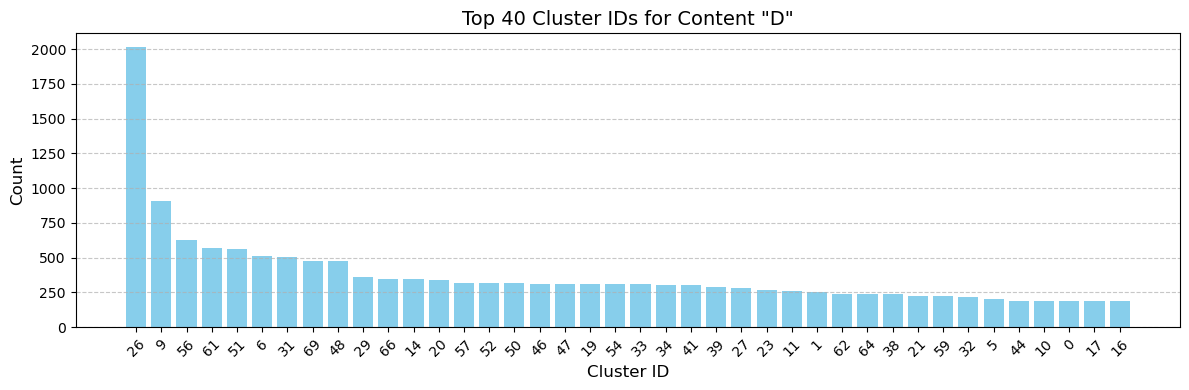

In [23]:
import matplotlib.pyplot as plt

cluster_counts = phones[phones['content'] == 'D'].ClusterId.value_counts()

# Select the top 20 clusters
top_20_clusters = cluster_counts.nlargest(40)

# Create a bar plot treating x-axis as categorical
plt.figure(figsize=(12, 4))
plt.bar(range(len(top_20_clusters)), top_20_clusters.values, color='skyblue')  # Use range(len(...)) for x-axis

# Explicitly set x-axis as categorical by labeling with cluster IDs
plt.xticks(range(len(top_20_clusters)), top_20_clusters.index, rotation=45, fontsize=10)

# Add labels and title
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 40 Cluster IDs for Content "D"', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


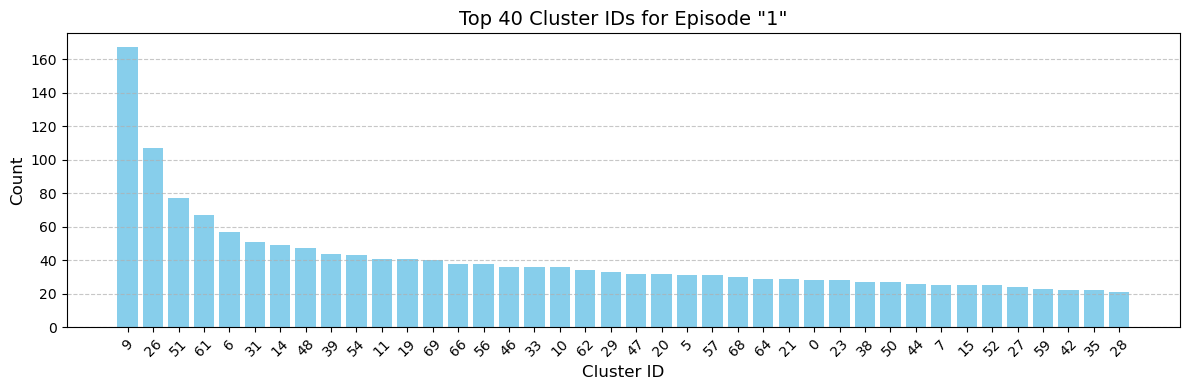

In [26]:
cluster_counts = phones[phones['file_idx'] == 1].ClusterId.value_counts()

# Select the top 20 clusters
top_20_clusters = cluster_counts.nlargest(40)

# Create a bar plot treating x-axis as categorical
plt.figure(figsize=(12, 4))
plt.bar(range(len(top_20_clusters)), top_20_clusters.values, color='skyblue')  # Use range(len(...)) for x-axis

# Explicitly set x-axis as categorical by labeling with cluster IDs
plt.xticks(range(len(top_20_clusters)), top_20_clusters.index, rotation=45, fontsize=10)

# Add labels and title
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 40 Cluster IDs for Episode "1"', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
phones.ClusterId.value_counts()

ClusterId
26    50116
9     24057
61    20817
56    18858
51    18049
      ...  
13      326
60      197
36      141
45       27
43       21
Name: count, Length: 70, dtype: int64

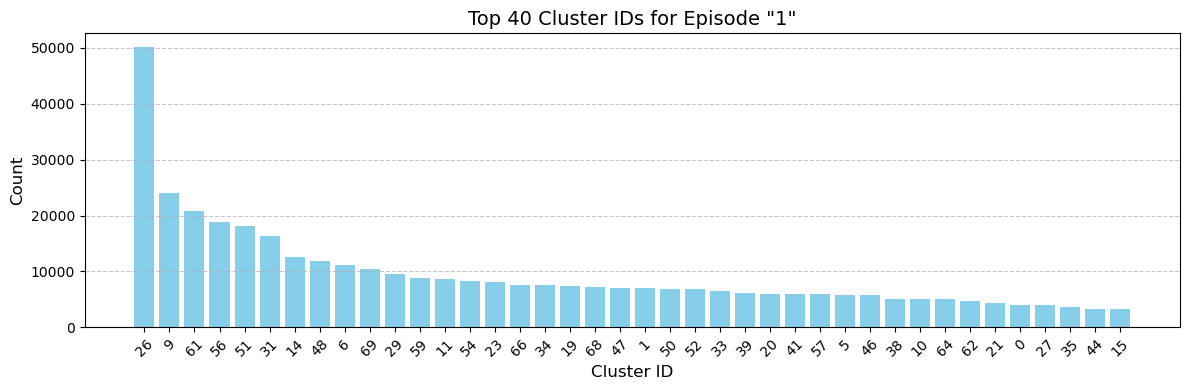

In [33]:
cluster_counts = phones.ClusterId.value_counts()

# Select the top 20 clusters
top_20_clusters = cluster_counts.nlargest(40)

# Create a bar plot treating x-axis as categorical
plt.figure(figsize=(12, 4))
plt.bar(range(len(top_20_clusters)), top_20_clusters.values, color='skyblue')  # Use range(len(...)) for x-axis

# Explicitly set x-axis as categorical by labeling with cluster IDs
plt.xticks(range(len(top_20_clusters)), top_20_clusters.index, rotation=45, fontsize=10)

# Add labels and title
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 40 Cluster IDs for Episode "1"', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

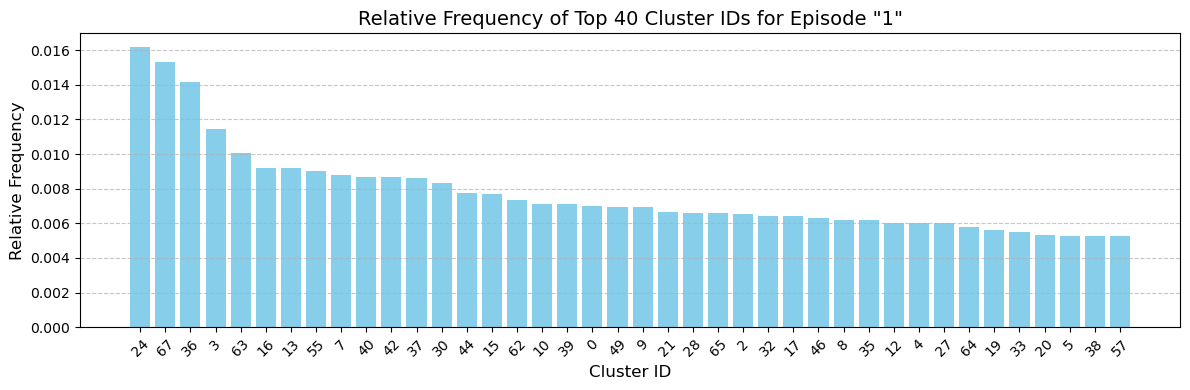

In [34]:
# Assuming 'phones' DataFrame is available
# Calculate the cluster counts for file_idx == 1
cluster_counts = phones[phones['file_idx'] == 1].ClusterId.value_counts()

# Calculate the total counts for each ClusterId in the entire DataFrame
total_cluster_counts = phones.ClusterId.value_counts()

# Calculate the relative frequency for the top 40 clusters
relative_frequencies = cluster_counts / total_cluster_counts

# Select the top 40 clusters based on the initial cluster_counts
top_40_clusters = relative_frequencies.nlargest(40)

# Create a bar plot with relative frequencies on the y-axis
plt.figure(figsize=(12, 4))
plt.bar(range(len(top_40_clusters)), top_40_clusters.values, color='skyblue')

# Explicitly set x-axis as categorical by labeling with cluster IDs
plt.xticks(range(len(top_40_clusters)), top_40_clusters.index, rotation=45, fontsize=10)

# Add labels and title
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.title('Relative Frequency of Top 40 Cluster IDs for Episode "1"', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


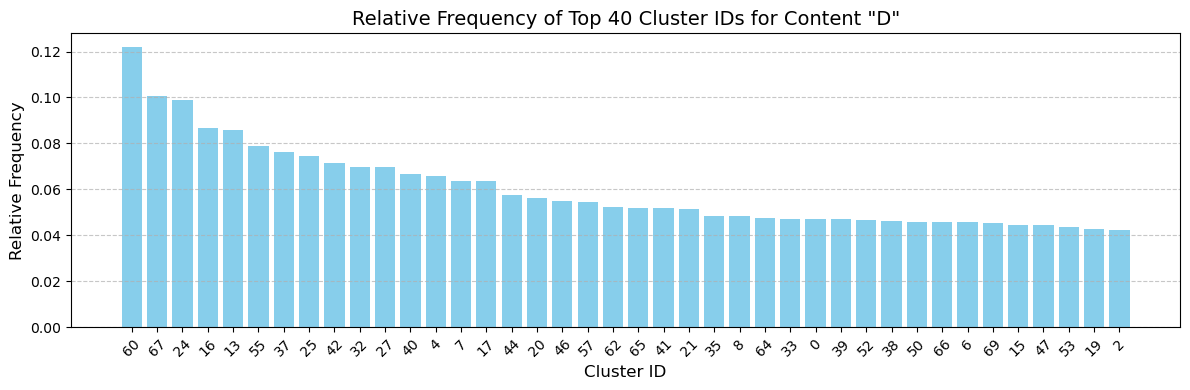

In [35]:
import matplotlib.pyplot as plt

# Assuming 'phones' DataFrame is available
# Calculate the cluster counts for content == 'D'
cluster_counts = phones[phones['content'] == 'D'].ClusterId.value_counts()

# Calculate the total counts for each ClusterId in the entire DataFrame
total_cluster_counts = phones.ClusterId.value_counts()

# Calculate the relative frequency for the top 40 clusters
relative_frequencies = cluster_counts / total_cluster_counts

# Select the top 40 clusters based on the initial cluster_counts
top_40_clusters = relative_frequencies.nlargest(40)

# Create a bar plot with relative frequencies on the y-axis
plt.figure(figsize=(12, 4))
plt.bar(range(len(top_40_clusters)), top_40_clusters.values, color='skyblue')  # Use range(len(...)) for x-axis

# Explicitly set x-axis as categorical by labeling with cluster IDs
plt.xticks(range(len(top_40_clusters)), top_40_clusters.index, rotation=45, fontsize=10)

# Add labels and title
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.title('Relative Frequency of Top 40 Cluster IDs for Content "D"', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Pipeline & Testing Cluster Size

In [5]:
def sample_merged_files(n_episodes, sample_fraction=0.05):
    merge_directory = "/shared/3/projects/bangzhao/prosodic_embeddings/merge/output_phones/"
    clustering_directory = "/shared/3/projects/bangzhao/prosodic_embeddings/merge/clustering/"
    
    dataframes = []
    file_count = 0

    # Random sampling during directory scan
    sampled_csv_files = []
    total_files_scanned = 0
    
    print("Randomly sampling files from the directory...")
    with os.scandir(merge_directory) as it:
        for entry in tqdm(it, desc="Sampling files"):
            if entry.is_file() and entry.name.endswith('.csv'):
                total_files_scanned += 1
                # Randomly decide whether to include this file in the sample
                if len(sampled_csv_files) < n_episodes:
                    sampled_csv_files.append(entry)
                else:
                    # Replace an already sampled file with a decreasing probability
                    replace_idx = random.randint(0, total_files_scanned - 1)
                    if replace_idx < n_episodes:
                        sampled_csv_files[replace_idx] = entry

    # Initialize tqdm progress bar for processing files
    print(f"Processing {len(sampled_csv_files)} sampled files...")
    with tqdm(total=len(sampled_csv_files), desc="Processing CSV files") as pbar:
        for entry in sampled_csv_files:
            try:
                file_path = entry.path
                df = pd.read_csv(file_path)

                # Sample 5% of the rows from each CSV file
                df = df.sample(frac=sample_fraction, random_state=42)
                
                # Store the file index to distinguish file when merged
                file_idx = entry.name.split('-')[0]
                df['file_idx'] = file_idx
                # Drop 'index' and 'Speaker' columns from the DataFrame
                df = df.drop(columns=['index', 'Speaker'])
                dataframes.append(df)
                file_count += 1
    
                # Update the progress bar
                pbar.update(1)
            except Exception as e:
                print(f"Error reading {entry.name}: {e}")
                pbar.update(1)  # Ensure progress bar continues even if a file fails
    
    if dataframes:
        merged_dataframe = pd.concat(dataframes, ignore_index=True)  # Concatenate all the csv files
        output_path = os.path.join(clustering_directory, f"Random_{n_episodes}_Sampled_{str(sample_fraction*100)}%_MergedFiles.csv") 
        merged_dataframe.to_csv(output_path, index=False)  # Save the merged csv file
        print(f"Merged {file_count} randomly sampled CSV files into {output_path}")
    else:
        print("No files were merged.")
    return merged_dataframe

In [61]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

def cluster_phones(df, n_episodes=None, n_clusters=None, load_cluster=False, cluster_name=None, f0f1=True, sixfeatures=False):
    clustering_directory = "/shared/3/projects/bangzhao/prosodic_embeddings/merge/clustering/"
    os.makedirs(clustering_directory, exist_ok=True)

    # Determine feature columns
    if f0f1:
        feature_cols = ['F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz']
        suffix = "f0f1"
    elif sixfeatures:
        feature_cols = [
            'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz', 'mfcc1_sma3',
            'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3']
        suffix = "6features"
    else:
        feature_cols = [
            'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz', 'mfcc1_sma3',
            'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nzSlope',
            'F1frequency_sma3nzSlope', 'mfcc1_sma3Slope', 'mfcc2_sma3Slope',
            'mfcc3_sma3Slope', 'mfcc4_sma3Slope']
        suffix = "allfeatures"

    # Drop rows with NaNs in selected features
    X = df[feature_cols].dropna()
    X_index = X.index

    # Load or train model
    if load_cluster:
        kmeans, scaler = joblib.load(os.path.join(clustering_directory, cluster_name))
    else:
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(X)

        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)

        # Save both model and scaler
        # joblib.dump((kmeans, scaler), os.path.join(
        #     clustering_directory, f'kmeans_{n_episodes}epi_{n_clusters}clu_{suffix}.pkl'))

    # Transform using scaler (if loaded)
    X_scaled = scaler.transform(X)

    # Predict clusters and assign
    labels = kmeans.predict(X_scaled)
    df.loc[X_index, 'ClusterId'] = labels

    return df

In [48]:
def plot_clusters(phones, x_value='content', content='D', file_idx=1, n_clusters=40):
    import matplotlib.pyplot as plt
    if x_value == 'content':
        cluster_counts = phones[phones['content'] == content].ClusterId.value_counts()
    else:
        cluster_counts = phones[phones['file_idx'] == file_idx].ClusterId.value_counts()
        
    total_cluster_counts = phones.ClusterId.value_counts()
    
    # Calculate the relative frequency
    relative_frequencies = cluster_counts / total_cluster_counts
    
    top_40_clusters = relative_frequencies.nlargest(n_clusters)

    plt.figure(figsize=(12, 4))
    plt.bar(range(len(top_40_clusters)), top_40_clusters.values, color='skyblue')  # Use range(len(...)) for x-axis
    plt.xticks(range(len(top_40_clusters)), top_40_clusters.index, rotation=45, fontsize=10)
    plt.xlabel('Cluster ID', fontsize=12)
    plt.ylabel('Relative Frequency', fontsize=12)
    if x_value == 'content':
        plt.title(f'Relative Frequency of Top {n_clusters} Cluster IDs for {x_value} "{content}"', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [8]:
df = sample_merged_files(10000, 0.05)

Randomly sampling files from the directory...


Sampling files: 444630it [00:40, 11011.90it/s]


Processing 10000 sampled files...


Processing CSV files:   1%|▏                 | 95/10000 [00:11<19:51,  8.31it/s]


KeyboardInterrupt: 

In [30]:
df = pd.read_csv(clustering_directory+'Random_10000_Sampled_5.0%_MergedFiles.csv')

In [31]:
df = df.sample(frac=0.5, random_state=42)

In [62]:
len(df)

3322822

In [63]:
df = cluster_phones(df, 10000, 20, load_cluster=False, cluster_name=None, f0f1=True, sixfeatures=False)

In [59]:
df = cluster_phones(df, 10000, 10, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 20, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 50, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 100, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 200, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 500, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)
df = cluster_phones(df, 10000, 1000, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)

1

In [60]:
df = cluster_phones(df, 10000, 10, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 20, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 50, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 100, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 200, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 500, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)
df = cluster_phones(df, 10000, 1000, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=False)

1

In [19]:
# df = pd.read_csv(clustering_directory+'/test/Random_200MergedFiles.csv')

In [20]:
# df = cluster_phones(df, 10000, 20, load_cluster=False, cluster_name=None, f0f1=False, sixfeatures=True)

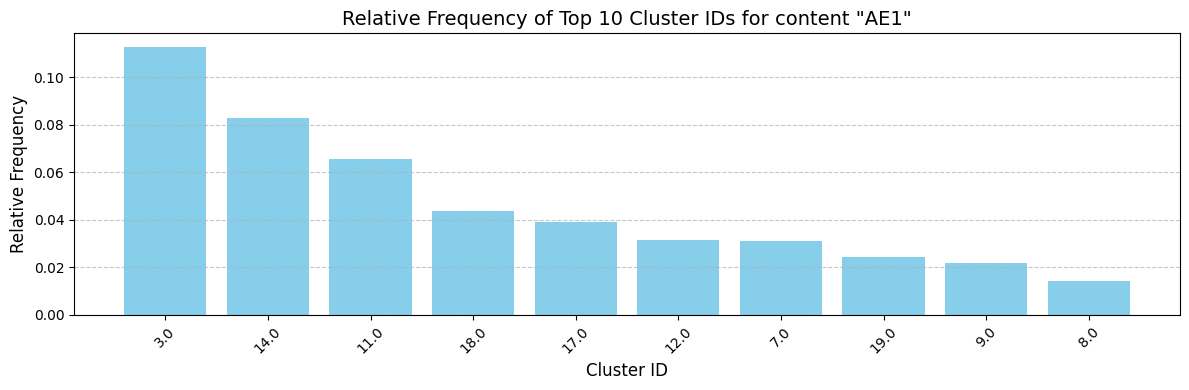

In [21]:
plot_clusters(df, x_value='content', content='AE1', file_idx=1, n_clusters=10)

In [64]:
df = df.sample(n=2000, random_state=42) if len(df) > 2000 else df

In [65]:
df

,start,end,content,Type,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nzSlope,F1frequency_sma3nzSlope,mfcc1_sma3Slope,mfcc2_sma3Slope,mfcc3_sma3Slope,mfcc4_sma3Slope,file_idx,ClusterId
5184745,1080.69,1080.77,L,phones,29.931582,367.151451,43.917854,27.255566,-7.524500,-27.598753,26.670399,-471.471100,215.460815,304.123564,187.878202,43.739023,131237,14.0
2387828,1814.74,1814.80,Y,phones,6.680374,629.850222,10.882704,13.986469,18.637526,9.240406,106.549170,-13.819625,58.403206,40.475510,-29.575849,92.205233,418780,15.0
3977401,3893.36,3893.39,N,phones,28.440071,353.305634,29.936216,6.175869,33.711002,21.191019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50271,19.0
2882922,1085.25,1085.29,DH,phones,22.976820,395.016235,18.266210,24.529916,-0.912113,15.511496,18.354797,-3586.779785,394.948053,97.350216,366.365159,-50.763273,176845,9.0
63504,1439.38,1439.44,ER1,phones,27.884588,837.721476,40.006208,-31.527269,3.182185,9.612157,-23.266649,7860.969543,135.179520,-210.266399,-475.164115,48.360395,144650,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695534,283.04,283.08,AY1,phones,22.366122,600.413574,40.709980,-26.159671,-11.636628,-5.846119,444.917307,-388.333740,118.539734,-421.802950,360.272884,411.689200,114693,18.0
4050736,736.90,736.96,HH,phones,0.000000,457.996785,28.683482,-37.830887,-11.064271,15.855623,0.000000,-7234.401703,691.556907,32.257175,-477.287076,-250.757825,215953,10.0
3396090,467.75,467.93,AY1,phones,17.682105,596.788075,39.033486,-18.706903,16.255659,4.192174,122.446374,-4035.049092,88.331083,8.783511,-12.156032,-196.117010,233696,18.0
3570276,354.19,354.23,R,phones,35.568390,662.177872,6.415915,-27.085157,5.479764,10.162917,-5.730057,23988.041687,804.744101,416.843414,742.717594,-270.900083,136964,5.0


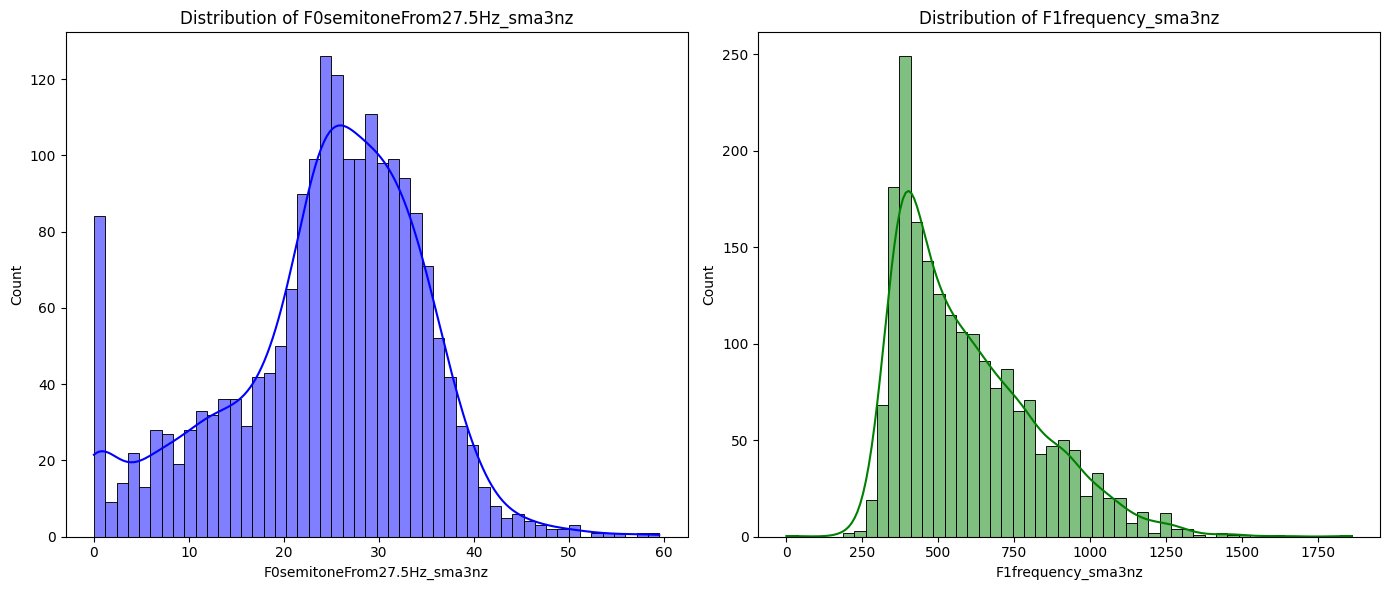

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Plot the distribution of F0 and F1 using histograms
plt.figure(figsize=(14, 6))

# Histogram for F0
plt.subplot(1, 2, 1)
sns.histplot(df['F0semitoneFrom27.5Hz_sma3nz'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of F0semitoneFrom27.5Hz_sma3nz')
plt.xlabel('F0semitoneFrom27.5Hz_sma3nz')
plt.ylabel('Count')

# Histogram for F1
plt.subplot(1, 2, 2)
sns.histplot(df['F1frequency_sma3nz'].dropna(), kde=True, bins=50, color='green')
plt.title('Distribution of F1frequency_sma3nz')
plt.xlabel('F1frequency_sma3nz')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

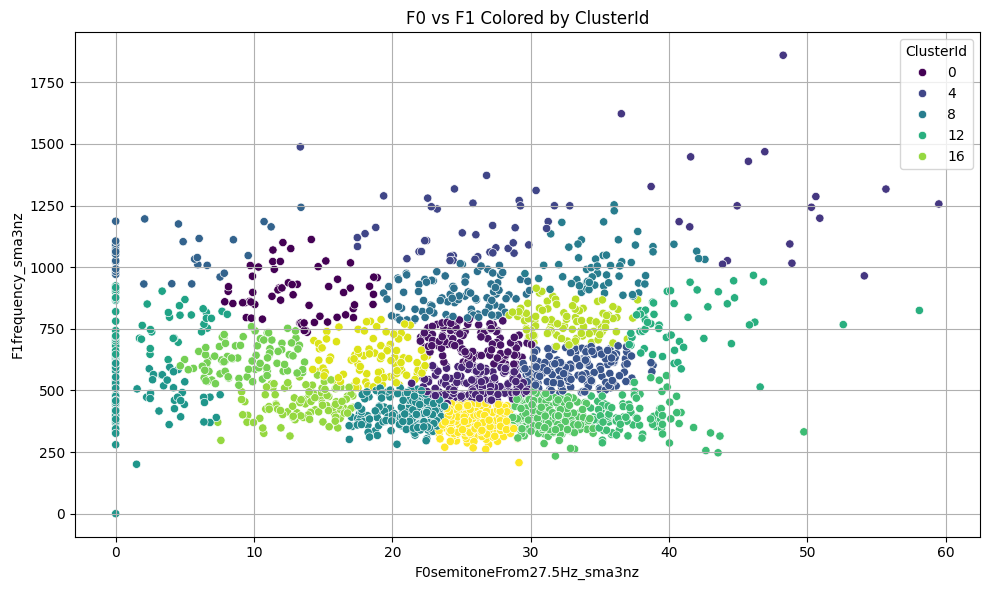

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already available as 'df')
# If df is not loaded, replace this line with code to load your data
# df = pd.read_csv('your_file.csv')

from sklearn.preprocessing import MinMaxScaler

# Check for required columns
required_columns = ['F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz', 'ClusterId']

# Example DataFrame (for demonstration if df not defined)
# You can remove this block if you have your df loaded
import numpy as np

# Plotting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='F0semitoneFrom27.5Hz_sma3nz',
    y='F1frequency_sma3nz',
    hue='ClusterId',
    palette='viridis'
)

plt.title('F0 vs F1 Colored by ClusterId')
plt.xlabel('F0semitoneFrom27.5Hz_sma3nz')
plt.ylabel('F1frequency_sma3nz')
plt.legend(title='ClusterId')
plt.grid(True)
plt.tight_layout()
plt.show()
